In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.ticker as ptick
import scipy.special as sp

In [201]:
df = pd.read_csv("./WaveData/scope_126.csv", names = ["time", "signal", "sync"], skiprows = 2, skipfooter=1, engine="python")

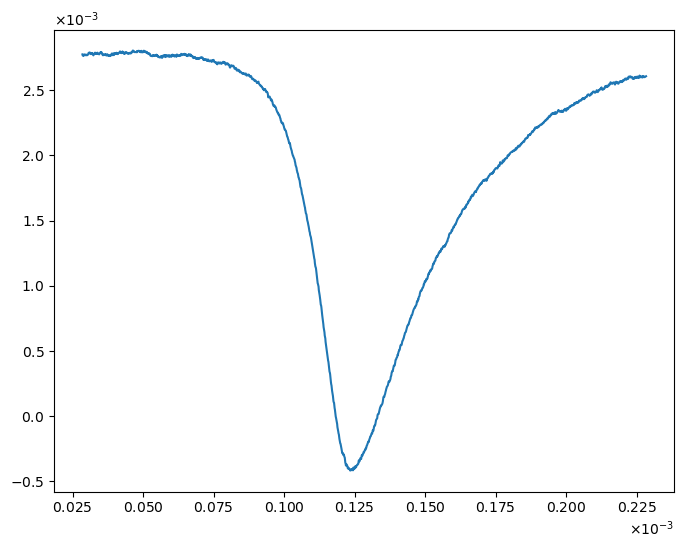

In [202]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(df.time, df.signal)
#plt.grid(which="both")
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="x", scilimits=(-3,-3))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))

In [203]:
def CrystalBall(x, x0, sigma_left, alpha_left, n_left, 
                sigma_right, alpha_right,n_right, const, Cap_N):
  Al = (n_left/np.abs(alpha_left))**n_left*np.exp(-alpha_left**2/2)
  Ar = (n_right/np.abs(alpha_right))**n_right*np.exp(-alpha_right**2/2)
  Bl = n_left/np.abs(alpha_left)-np.abs(alpha_left)
  Br = n_right/np.abs(alpha_right)-np.abs(alpha_right)
  Cl = (n_left/np.abs(alpha_left))*(1/(n_left-1))*np.exp(-alpha_left**2/2)
  Cr = (n_right/np.abs(alpha_right))*(1/(n_right-1))*np.exp(-alpha_right**2/2)
  Dl = np.sqrt(np.pi/2)*(1+sp.erf(np.abs(alpha_left)/np.sqrt(2)))
  Dr = np.sqrt(np.pi/2)*(1+sp.erf(np.abs(alpha_right)/np.sqrt(2)))
  Nl = 1/(sigma_left*(Cl+Dl))
  Nr = 1/(sigma_right*(Cr+Dr))

  """
  if (x-x0)/sigma_left <= -alpha_left:
    y = const-Nl*Al*(Bl-(x-x0)/sigma_left)**(-n_left)
  elif -alpha_left< (x-x0)/sigma_left <= 0 :
    y = const-Nl*np.exp(-0.5*(x-x0)**2/sigma_left**2)
  elif 0 < (x-x0)/sigma_right <= alpha_right:
    y = const-Nr*np.exp(-0.5*(x-x0)**2/sigma_right**2)
  else:
    y = const-Nr*Ar*(Br+(x-x0)/sigma_right)**(-n_right)
  return y
  """

  if (x-x0)/sigma_left <= -alpha_left:
    y = const-Cap_N*Al*(Bl-(x-x0)/sigma_left)**(-n_left)
  elif -alpha_left< (x-x0)/sigma_left <= 0 :
    y = const-Cap_N*np.exp(-0.5*(x-x0)**2/sigma_left**2)
  elif 0 < (x-x0)/sigma_right <= alpha_right:
     y = const-Cap_N*np.exp(-0.5*(x-x0)**2/sigma_right**2)
  else:
     y = const-Cap_N*Ar*(Br+(x-x0)/sigma_right)**(-n_right)
  return y

crystal_ball = np.vectorize(CrystalBall)

In [204]:
#par, cov = curve_fit(crystal_ball, df.time, df.signal, p0 = (0.125*10**(-3), 0.125*10**(-3), 1, 3, 0.125*10**(-3), 1, 2, 3*10**(-3), 1))
par, cov = curve_fit(crystal_ball, df.time, df.signal, p0 = (1.24e-04, 1.08390763e-05, 1.12849285e+00, 9.04483335e+01, 2.08097853e-05, 6.07396123e-01, 1.31912331e+02, 2.96644947e-03, 3.20672825e-03))
x = np.linspace(0.1*10**(-3), 0.175*10**(-3), 1000)
y = crystal_ball(x, par[0], par[1], par[2], par[3], par[4], par[5], par[6], par[7], par[8])

/tmp/ipykernel_562/748180570.py:3: RuntimeWarning: overflow encountered in double_scalars
  Al = (n_left/np.abs(alpha_left))**n_left*np.exp(-alpha_left**2/2)
/tmp/ipykernel_562/748180570.py:4: RuntimeWarning: overflow encountered in double_scalars
  Ar = (n_right/np.abs(alpha_right))**n_right*np.exp(-alpha_right**2/2)
/tmp/ipykernel_562/748180570.py:27: RuntimeWarning: invalid value encountered in double_scalars
  y = const-Cap_N*Al*(Bl-(x-x0)/sigma_left)**(-n_left)
/tmp/ipykernel_562/748180570.py:33: RuntimeWarning: invalid value encountered in double_scalars
  y = const-Cap_N*Ar*(Br+(x-x0)/sigma_right)**(-n_right)
/tmp/ipykernel_562/748180570.py:3: RuntimeWarning: invalid value encountered in double_scalars
  Al = (n_left/np.abs(alpha_left))**n_left*np.exp(-alpha_left**2/2)
/tmp/ipykernel_562/748180570.py:4: RuntimeWarning: invalid value encountered in double_scalars
  Ar = (n_right/np.abs(alpha_right))**n_right*np.exp(-alpha_right**2/2)


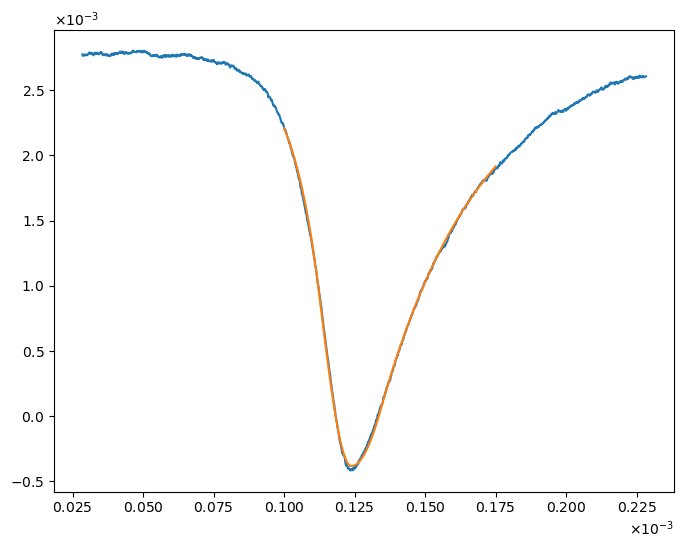

In [205]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(df.time, df.signal)
plt.plot(x, y)
#plt.grid(which="both")
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="x", scilimits=(-3,-3))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))

In [183]:
par

array([1.24000000e-04, 1.08390763e-05, 1.12849285e+00, 9.04483335e+01,
       2.08097853e-05, 6.07396123e-01, 1.31912331e+02, 2.96644947e-03,
       3.20672825e-03])

In [194]:
par

array([1.23874355e-04, 1.10241002e-05, 1.11555498e+00, 1.10317997e+02,
       2.09594891e-05, 6.04778111e-01, 1.31822993e+02, 2.95691627e-03,
       3.26222432e-03])

In [200]:
par

array([1.23038249e-04, 1.08385028e-05, 1.01754410e+00, 1.32662578e+02,
       1.29069415e-05, 3.98167108e-01, 2.23646158e+01, 2.86982975e-03,
       3.60988702e-03])

In [206]:
par

array([1.23834749e-04, 1.10394841e-05, 1.06030291e+00, 1.35309704e+01,
       1.92292973e-05, 5.36891608e-01, 1.29406299e+02, 2.80218903e-03,
       3.18543114e-03])